# **EDA + Logistic Regression + PCA**


Hello friends,

This kernel is all about **Principal Component Analysis** - a **Dimensionality Reduction** technique.

I have discussed **Principal Component Analysis (PCA)**. In particular, I have introduced PCA, explained variance ratio, Logistic Regression with PCA, find right number of dimensions and plotting explained variance ratio with number of dimensions.

I have used the **adult** data set for this kernel. This dataset is very small for PCA purpose. My main purpose is to demonstrate PCA implementation with this dataset.


**I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be very much appreciated**

## Table of Contents

The contents of this kernel is divided into various topics which are as follows:-

-   The Curse of Dimensionality
-	Introduction to Principal Component Analysis
-	Import Python libraries
-	Import dataset
-	Exploratory data analysis
-	Split data into training and test set
-	Feature engineering
-	Feature scaling
-	Logistic regression model with all features
-	Logistic Regression with PCA
-	Select right number of dimensions
-	Plot explained variance ratio with number of dimensions
-	Conclusion
-	References



## The Curse of Dimensionality

Generally, real world datasets contain thousands or millions of features to train for. This is very time consuming task as this makes training extremely slow. In such cases, it is very difficult to find a good solution. This problem is often referred to as the curse of dimensionality.


**The curse of dimensionality** refers to various phenomena that arise when we analyze and organize data in high dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings. The problem is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This sparsity is problematic for any method that requires statistical significance.


In real-world problems, it is often possible to reduce the number of dimensions considerably. This process is called **dimensionality reduction**. It refers to the process of reducing the number of dimensions under consideration by obtaining a set of principal variables. It helps to speed up training and is also extremely useful for data visualization.


The most popular dimensionality reduction technique is Principal Component Analysis (PCA), which is discussed below.



## Introduction to Principal Component Analysis (PCA)


**Principal Component Analysis (PCA)** is a dimensionality reduction technique that can be used to reduce a larger set of feature variables into a smaller set that still contains most of the variance in the larger set.

### Preserve the variance

PCA, first identifies the hyperplane that lies closest to the data and then it projects the data onto it. Before, we can project the training set onto a lower-dimensional hyperplane, we need to select the right hyperplane. The projection can be done in such a way so as to preserve the maximum variance. This is the idea behind PCA.

### Principal Components

PCA identifies the axes that accounts for the maximum amount of cumulative sum of variance in the training set. These are called Principal Components. PCA assumes that the dataset is centered around the origin. Scikit-Learn’s PCA classes take care of centering the data automatically.

### Projecting down to d Dimensions

Once, we have identified all the principal components, we can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components. This ensures that the projection will preserve as much variance as possible.



Now, let's get to the implementation.


## Import Python libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Working with os module - os is a module in Python 3.
# Its main purpose is to interact with the operating system.
# It provides functionalities to manipulate files and folders.

"""import os
print(os.listdir("../input"))
"""
# Any results you write to the current directory are saved as output.

'import os\nprint(os.listdir("../input"))\n'

### Check file size

In [4]:
print('# File sizes')
"""for f in os.listdir('../input'):
    print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')
"""

# File sizes


"for f in os.listdir('../input'):\n    print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')\n"

## Import dataset

In [8]:
%%time

file = ('/content/adult.csv')
df = pd.read_csv(file, encoding='latin-1')

CPU times: user 58.2 ms, sys: 25.8 ms, total: 84 ms
Wall time: 88.9 ms


In [9]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis

### Check shape of dataset

In [10]:
df.shape

(32561, 15)

We can see that there are 32561 instances and 15 attributes in the data set.

### Preview dataset

In [11]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### View summary of dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Encode `?` as `NaNs`

In [13]:
df[df == '?'] = np.nan

### Again check the summary of dataframe

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now, the summary shows that the variables - `workclass`, `occupation` and `native.country` contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

### Impute missing values with mode

In [15]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

### Check again for missing values

In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now we can see that there are no missing values in the dataset.

### Setting feature vector and target variable

In [17]:
X = df.drop(['income'], axis=1)

y = df['income']

In [19]:
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [20]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [18]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


## Split data into separate training and test set

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,State-gov,31627,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States
25206,39,Local-gov,236391,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
23491,42,Private,194710,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
12367,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
7054,38,Federal-gov,99527,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,90,Self-emp-not-inc,282095,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
19648,36,Private,279721,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
9845,26,Private,51961,12th,8,Never-married,Sales,Other-relative,Black,Male,0,0,51,United-States
10799,44,Private,115323,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [23]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
22278,56,Private,274475,9th,5,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States
8950,19,Private,237455,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,25,United-States
7838,23,Private,125491,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Female,0,0,35,Vietnam
16505,37,Federal-gov,48779,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
19140,49,Private,423222,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,37,Self-emp-not-inc,29054,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
26405,26,Private,165673,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
23236,25,Private,156848,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
26823,34,Private,148226,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,48,United-States


In [24]:
y_train

32098    <=50K
25206     >50K
23491    <=50K
12367    <=50K
7054      >50K
         ...  
13123    <=50K
19648    <=50K
9845     <=50K
10799     >50K
2732      >50K
Name: income, Length: 22792, dtype: object

In [25]:
y_test

22278    <=50K
8950     <=50K
7838     <=50K
16505    <=50K
19140     >50K
         ...  
21949    <=50K
26405    <=50K
23236    <=50K
26823    <=50K
20721     >50K
Name: income, Length: 9769, dtype: object

## Feature Engineering

### Encode categorical variables

In [26]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


In [27]:
X_train, X_test, y_train, y_test

(       age  workclass  fnlwgt  education  education.num  marital.status  \
 32098   40          6   31627          9             13               2   
 25206   39          1  236391         11              9               2   
 23491   42          3  194710         15             10               4   
 12367   27          1  273929         11              9               4   
 7054    38          0   99527         12             14               2   
 ...    ...        ...     ...        ...            ...             ...   
 13123   90          5  282095         15             10               2   
 19648   36          3  279721         11              9               2   
 9845    26          3   51961          2              8               4   
 10799   44          3  115323         12             14               2   
 2732    39          3  224531         11              9               2   
 
        occupation  relationship  race  sex  capital.gain  capital.loss  \
 32098     

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [29]:
X_train, X_test, y_train, y_test

(            age  workclass    fnlwgt  education  education.num  \
 0      0.101484   2.600478 -1.494279  -0.332263       1.133894   
 1      0.028248  -1.884720  0.438778   0.184396      -0.423425   
 2      0.247956  -0.090641  0.045292   1.217715      -0.034095   
 3     -0.850587  -1.884720  0.793152   0.184396      -0.423425   
 4     -0.044989  -2.781760 -0.853275   0.442726       1.523223   
 ...         ...        ...       ...        ...            ...   
 22787  3.763293   1.703439  0.870243   1.217715      -0.034095   
 22788 -0.191461  -0.090641  0.847831   0.184396      -0.423425   
 22789 -0.923823  -0.090641 -1.302317  -2.140570      -0.812755   
 22790  0.394429  -0.090641 -0.704154   0.442726       1.523223   
 22791  0.028248  -0.090641  0.326815   0.184396      -0.423425   
 
        marital.status  occupation  relationship      race       sex  \
 0           -0.402341   -0.782234      2.214196  0.392980 -1.430470   
 1           -0.402341   -0.026696     -0.899410  

## Logistic Regression model with all features

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with all the features: 0.8217


In [33]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

## Logistic Regression with PCA

Scikit-Learn's PCA class implements PCA algorithm using the code below. Before diving deep, I will explain another important concept called explained variance ratio.


### Explained Variance Ratio

A very useful piece of information is the **explained variance ratio** of each principal component. It is available via the `explained_variance_ratio_ ` variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

Now, let's get to the PCA implementation.


In [34]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_


array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

In [35]:
X_train

array([[-1.74453448, -1.44372786, -2.16422698, ..., -0.49169461,
        -1.48505183,  0.73865204],
       [ 0.62223658,  0.49117863,  0.13352266, ..., -0.38769783,
         0.33189103, -0.18923337],
       [-0.64701057, -1.08115659, -0.39157213, ...,  1.03646263,
         0.66666823, -1.01692683],
       ...,
       [-0.81413697,  1.67337571,  0.77139075, ...,  0.04683507,
        -0.3862579 ,  0.37862524],
       [ 1.46535949, -0.93546551, -0.39705611, ..., -0.0545075 ,
        -1.02553564,  0.04871497],
       [ 0.9935644 ,  0.36895764, -0.17597071, ..., -0.46921897,
         0.22508863, -0.23866049]])

### Comment

- We can see that approximately 97.25% of variance is explained by the first 13 variables.

- Only 2.75% of variance is explained by the last variable. So, we can assume that it carries little information.

- So, I will drop it, train the model again and calculate the accuracy.



### Logistic Regression with first 13 features

In [37]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 13 features: 0.8213


In [36]:
X_train, X_test, y_train, y_test

(array([[-1.74453448, -1.44372786, -2.16422698, ..., -0.49169461,
         -1.48505183,  0.73865204],
        [ 0.62223658,  0.49117863,  0.13352266, ..., -0.38769783,
          0.33189103, -0.18923337],
        [-0.64701057, -1.08115659, -0.39157213, ...,  1.03646263,
          0.66666823, -1.01692683],
        ...,
        [-0.81413697,  1.67337571,  0.77139075, ...,  0.04683507,
         -0.3862579 ,  0.37862524],
        [ 1.46535949, -0.93546551, -0.39705611, ..., -0.0545075 ,
         -1.02553564,  0.04871497],
        [ 0.9935644 ,  0.36895764, -0.17597071, ..., -0.46921897,
          0.22508863, -0.23866049]]),
            age  workclass    fnlwgt  education  education.num  marital.status  \
 0     1.273263  -0.090641  0.798307  -1.107252      -1.980744        2.255673   
 1    -1.436476  -0.090641  0.448823   0.184396      -0.423425        0.926666   
 2    -1.143531  -0.090641 -0.608164   1.217715      -0.034095        0.926666   
 3    -0.118225  -2.781760 -1.332357  -0.3322

### Comment

- We can see that accuracy has been decreased from 0.8218 to 0.8213 after dropping the last feature.

- Now, if I take the last two features combined, then we can see that approximately 7% of variance is explained by them.

- I will drop them, train the model again and calculate the accuracy.


### Logistic Regression with first 12 features

In [ ]:
X = df.drop(['income','native.country', 'hours.per.week'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 12 features: 0.8227


### Comment

- Now, it can be seen that the accuracy has been increased to 0.8227, if the model is trained with 12 features.

- Lastly, I will take the last three features combined. Approximately 11.83% of variance is explained by them.

- I will repeat the process, drop these features, train the model again and calculate the accuracy.


### Logistic Regression with first 11 features

In [ ]:
X = df.drop(['income','native.country', 'hours.per.week', 'capital.loss'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
"""
n machine learning projects, we usually deal with datasets having different categorical columns where some columns have their elements in the ordinal variable category for e.g a column income level having elements as low, medium, or high in this case we can replace these elements with 1,2,3. where 1 represents ‘low’  2  ‘medium’  and 3′ high’. Through this type of encoding, we try to preserve the meaning of the element where higher weights are assigned to the elements having higher priority.

Label Encoding
Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

Example Of Label Encoding
Suppose we have a column Height in some dataset that has elements as Tall, Medium, and short. To convert this categorical column into a numerical column we will apply label encoding to this column. After applying label encoding, the Height column is converted into a numerical column having elements 0,1, and 2 where 0 is the label for tall, 1 is the label for medium, and 2 is the label for short height.

Height	Height
Tall	0
Medium	1
Short
"""

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 11 features: 0.8187


### Comment

- We can see that accuracy has significantly decreased to 0.8187 if I drop the last three features.

- Our aim is to maximize the accuracy. We get maximum accuracy with the first 12 features and the accuracy is 0.8227.

## Select right number of dimensions

- The above process works well if the number of dimensions are small.

- But, it is quite cumbersome if we have large number of dimensions.

- In that case, a better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

- The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [38]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


In [39]:
X_train, X_test, y_train, y_test

(            age  workclass    fnlwgt  education  education.num  \
 0      0.101484   2.600478 -1.494279  -0.332263       1.133894   
 1      0.028248  -1.884720  0.438778   0.184396      -0.423425   
 2      0.247956  -0.090641  0.045292   1.217715      -0.034095   
 3     -0.850587  -1.884720  0.793152   0.184396      -0.423425   
 4     -0.044989  -2.781760 -0.853275   0.442726       1.523223   
 ...         ...        ...       ...        ...            ...   
 22787  3.763293   1.703439  0.870243   1.217715      -0.034095   
 22788 -0.191461  -0.090641  0.847831   0.184396      -0.423425   
 22789 -0.923823  -0.090641 -1.302317  -2.140570      -0.812755   
 22790  0.394429  -0.090641 -0.704154   0.442726       1.523223   
 22791  0.028248  -0.090641  0.326815   0.184396      -0.423425   
 
        marital.status  occupation  relationship      race       sex  \
 0           -0.402341   -0.782234      2.214196  0.392980 -1.430470   
 1           -0.402341   -0.026696     -0.899410  

### Comment

- With the required number of dimensions found, we can then set number of dimensions to `dim` and run PCA again.

- With the number of dimensions set to `dim`, we can then calculate the required accuracy.

## Plot explained variance ratio with number of dimensions

- An alternative option is to plot the explained variance as a function of the number of dimensions.

- In the plot, we should look for an elbow where the explained variance stops growing fast.

- This can be thought of as the intrinsic dimensionality of the dataset.

- Now, I will plot cumulative explained variance ratio with number of components to show how variance ratio varies with number of components.
Intrinsic vs. extrinsic dimensionality
Now that we have some basic ideas down – namely, “space” and “dimensions” – let’s move on to the core of this blog post: intrinsic dimensionality. Before we move on, let me spoil the ending: the intrinsic dimensionality of a space is the number of required pieces of information that we need to describe each object in the space. This may differ from the number of pieces of information that we are using, which we call the extrinsic dimensionality of the space.

Let’s make this concrete with an example. Let’s say we’re in some situtation we’re we are dealing with objects in some extrinsically D
-dimensional space. Thus, we are dealing with D
 pieces of information for describing objects in that space. One may ask a simple question: do we really need D
 pieces of information to describe each object? Or can we get by with fewer?

Take the following example: we want to describe all points on a flat piece of paper in 3D space. That is, all of the points that we care about will lie only on the sheet of paper.

drawing
Of course, we can use each points x, y, and z coordinates, but do we really need three pieces of information to describe each point on the paper? The answer is no, we really only need two! Intuitively, we can specify each point on the paper using two coordinates: its distance from the left edge of the paper and its distance from the top edge of the paper:

drawing
Of course, representing each point on the paper using these new coordinates requires keeping track of the position of the left edge and top edge in 3D space; however, once we have this information handy, then every point on the paper can be represented using only these two coordinates.

The intrinsic dimensionality of a space is the number of required pieces of information for representing each object. In the piece of paper example, only two coordinates are needed to describe each point on the paper, and thus, it can be said that the “space” of the paper (i.e., the set of all points that lie on the paper) is intrinsically only two-dimensional rather than three-dimensional. Notably, the intrinsic dimensionality of a space may be different than its explicit dimensionality. That is, even though we may be representing each point on the paper using their original three coordinates in 3D space, we could instead only use two.

When will the intrinsic dimensionality of a space be smaller than its extrinsic dimensionality? Intuitively, this will happen when the space that we care about can be formed by taking a subset of the full extrinsic space. In the piece of paper example of above, we only care about the subset of points in 3D space that lie on the piece of paper. By taking a subset, we are in essence coming up with a new, smaller space than the full 3D space. Such spaces are called subspaces.

[Python-numpy-cumsum.png](https://journaldev.nyc3.digitaloceanspaces.com/2019/09/Python-numpy-cumsum.png)

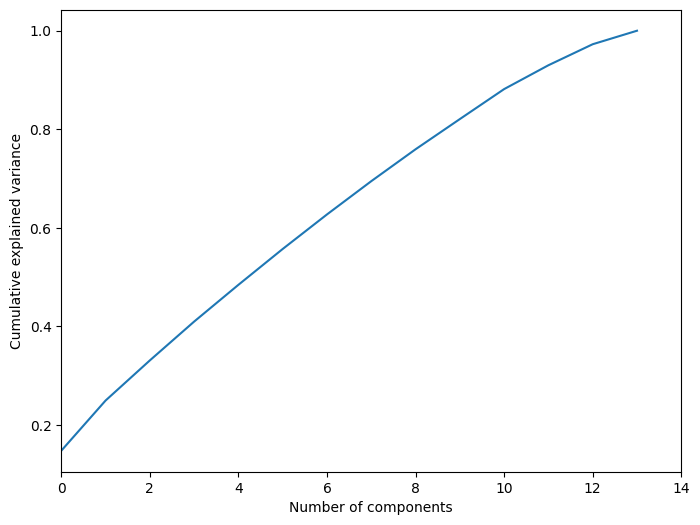

In [40]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Comment

The above plot shows that almost 90% of variance is explained by the first 12 components.

## Conclusion

-	In this kernel, I have discussed Principal Component Analysis – the most popular dimensionality reduction technique.
-	I have demonstrated PCA implementation with Logistic Regression on the adult dataset.
-	I found the maximum accuracy with the first 12 features and it is found to be 0.8227.
-	As expected, the number of dimensions required to preserve 90 % of variance is found to be 12.
-	Finally, I plot the explained variance ratio with number of dimensions. The graph confirms that approximately 90% of variance is explained by the first 12 components.


## References

The ideas and concepts in this kernel are taken from the following book.

- Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurelien Geron.